In [37]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [38]:
def remove_all_rows_exept(df, row_to_keep, column_num):
    return df[df.iloc[:, column_num] == row_to_keep]

In [39]:
def plot(bank, data, path, method, detrending, deseasoning):
    if detrending == 'detrended':
        if deseasoning == 'deseasoned':
           df = pd.read_csv(path + '_' + method + '_' + detrending + '_and_' + deseasoning + '.csv')
        else:
            df = pd.read_csv(path + '_' + method + '_' + detrending + '.csv')
    else:
        df = pd.read_csv(path + '_' + method + '.csv')
    df[df.columns[0]] = pd.to_datetime(df[df.columns[0]])
    df = remove_all_rows_exept(df, bank, 2)
    plt.figure(figsize=(14, 7))
    plt.style.use('_mpl-gallery')
    plt.title(bank + '`s ' + data + ' ' + detrending + ' ' + deseasoning + ' using ' + method)
    plt.plot(df[df.columns[2]], df[data])
    plt.legend()
    plt.show()
    print(df)
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


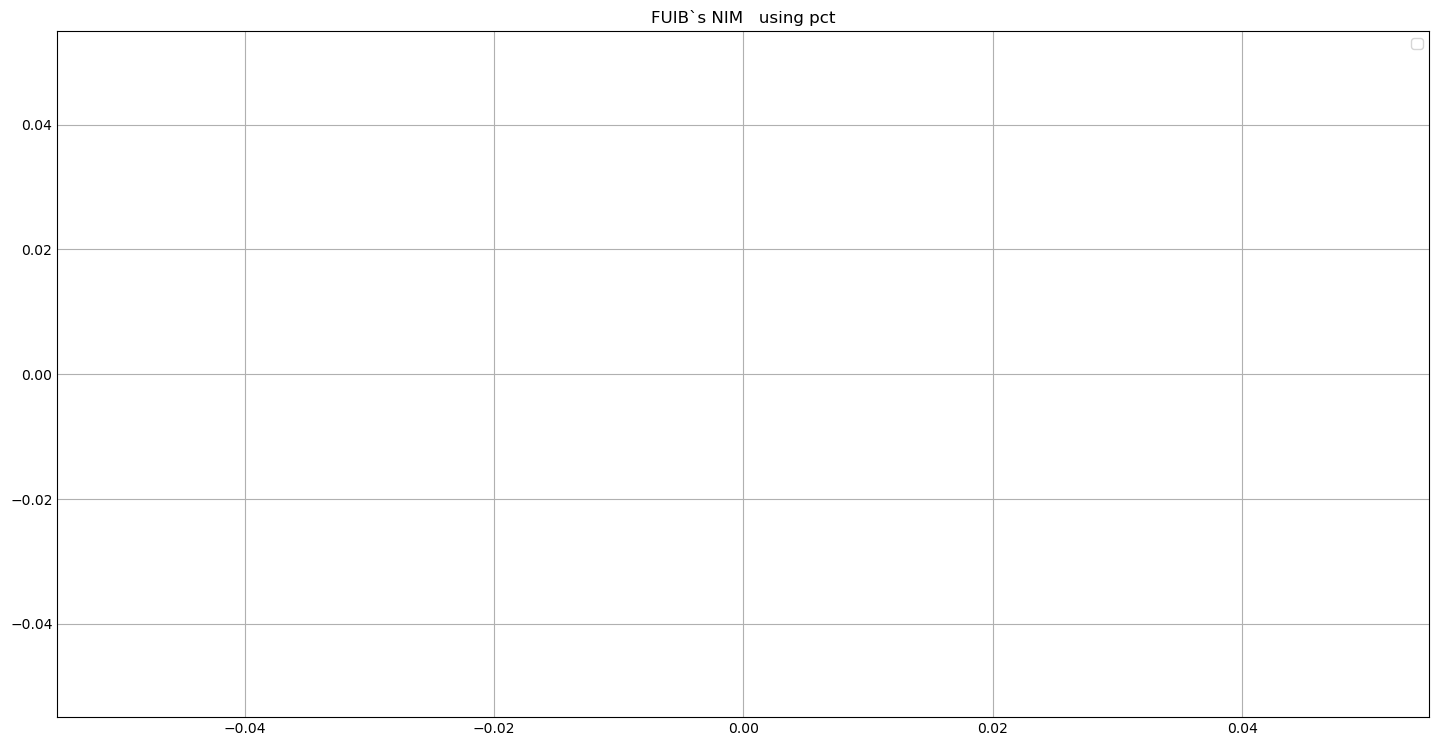

Empty DataFrame
Columns: [Unnamed: 0, Bank, Date, INF, PR, CR, OE, ROA, NIA, NIM, RA, SCTA, CDR, LAS, SIZE, is_Credit_Agricole, is_FUIB, is_Kredobank, is_OTP, is_Oschadbank, is_Pivdennyi, is_Privat_Bank, is_Raiffeisen, is_Sense, is_Ukrsibbank, is_Universal]
Index: []

[0 rows x 26 columns]


In [40]:
plot('FUIB', 'NIM', './../data/11_flattenned/flatten_variables', 'pct', '', '')